<a href="https://colab.research.google.com/github/Gorchon/AnalyticsCourse/blob/main/Evidencia_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('database_evidencia.csv')

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Entity                                              248 non-null    object 
 1   Code                                                248 non-null    object 
 2   Year                                                248 non-null    int64  
 3   Annual working hours per worker                     248 non-null    float64
 4   GDP per capita (output, multiple price benchmarks)  248 non-null    float64
 5   Population (historical estimates)                   248 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 11.8+ KB
None


In [ ]:
df.describe()

,Year,Annual working hours per worker,"GDP per capita (output, multiple price benchmarks)",Population (historical estimates)
count,248.000000,248.000000,248.000000,2.480000e+02
mean,1987.838710,2011.072606,21411.790612,3.045401e+07
std,18.972124,336.576923,15298.828643,3.379464e+07
min,1950.000000,1380.607700,4126.961000,3.114676e+06
25%,1973.000000,1768.816450,10971.505500,5.141954e+06
50%,1988.500000,2120.500000,15933.903000,7.324500e+06
75%,2004.000000,2253.157600,27824.989500,4.206134e+07
max,2019.000000,2723.590800,68567.914000,1.250853e+08


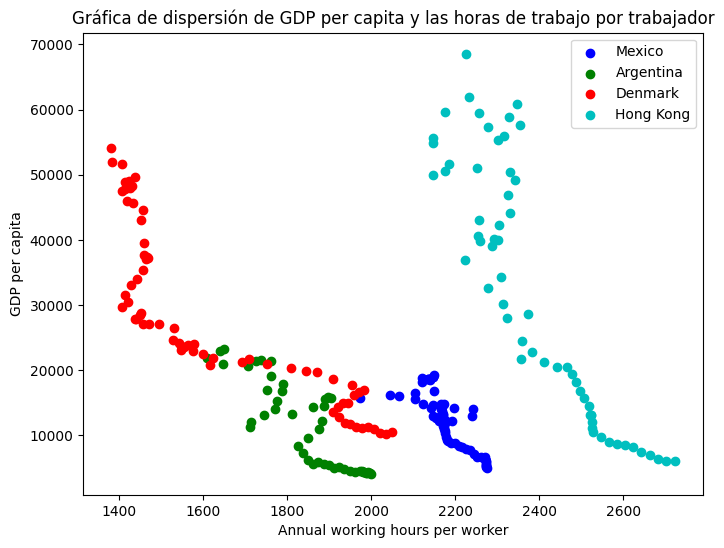

In [ ]:
paises = ['Mexico', 'Argentina', 'Denmark', 'Hong Kong']
colores = ['b', 'g', 'r', 'c']  # Asigna un color a cada país

# Crear una figura
fig = plt.figure(figsize=(8, 6))

# Iterar a través de los países y dibujar puntos con colores diferentes
for i, pais in enumerate(paises):
    x = df[df['Entity'] == pais]['Annual working hours per worker']  # Datos x para el país actual
    y = df[df['Entity'] == pais]['GDP per capita (output, multiple price benchmarks)']  # Datos y para el país actual
    plt.scatter(x, y, label=pais, color=colores[i])

# Personalizar la gráfica
plt.xlabel('Annual working hours per worker')
plt.ylabel('GDP per capita')
plt.title('Gráfica de dispersión de GDP per capita y las horas de trabajo por trabajador')
plt.legend()


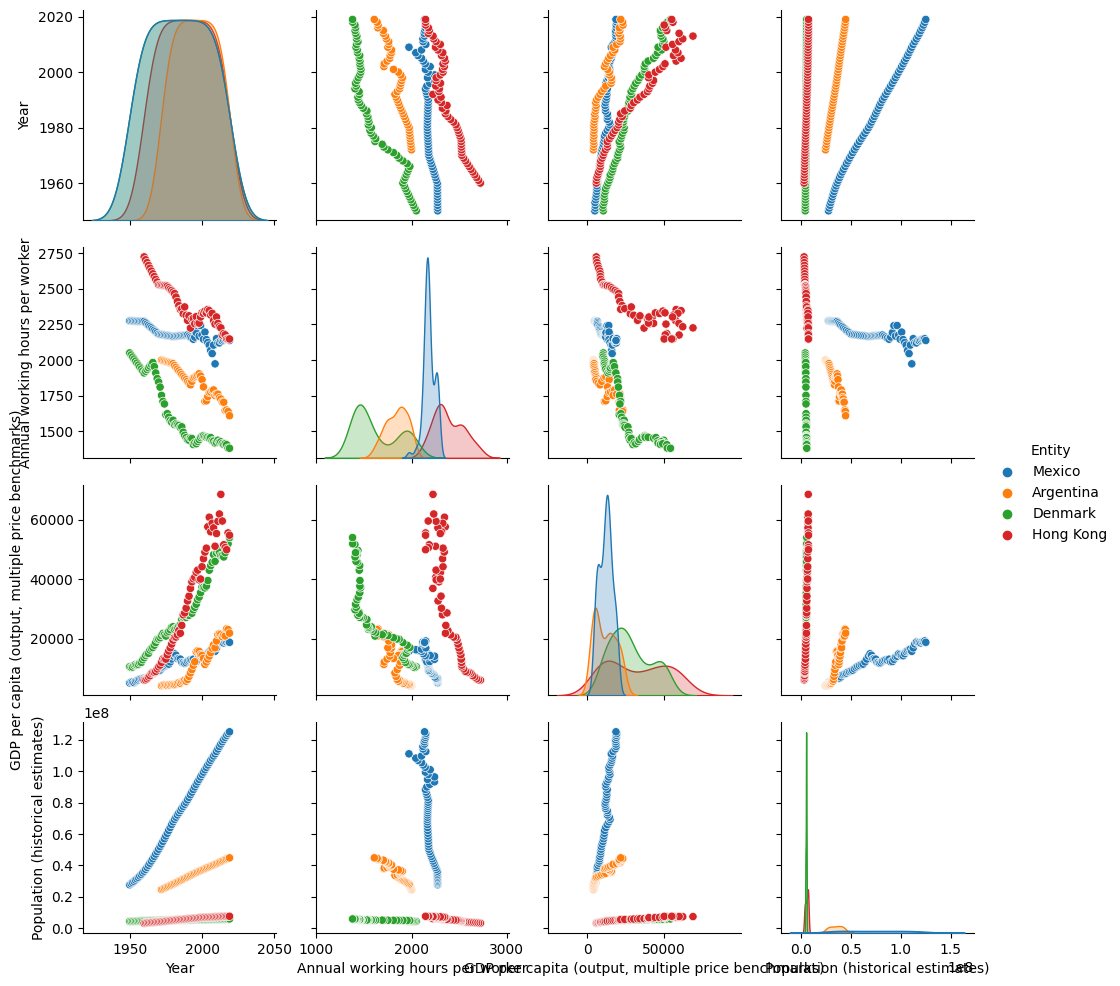

In [ ]:
sns.pairplot(data = df, hue = 'Entity')

<ipython-input-140-9475dd3f4a83>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_GDP = df.groupby("Entity").mean()


Text(0.5, 1.0, 'Gráfico de pastel, promedio PIB por país')

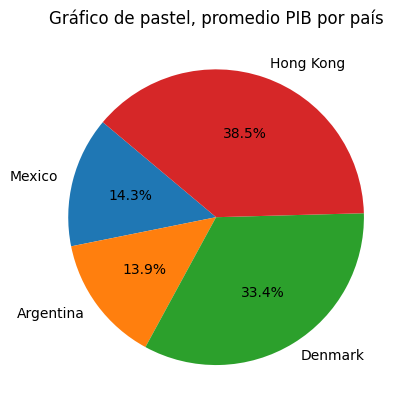

In [ ]:
datos_GDP = df.groupby("Entity").mean()
promedio_mexico = datos_GDP.loc['Mexico', 'GDP per capita (output, multiple price benchmarks)']
promedio_Argentina = datos_GDP.loc['Argentina', 'GDP per capita (output, multiple price benchmarks)']
promedio_denmark = datos_GDP.loc['Denmark', 'GDP per capita (output, multiple price benchmarks)']
promedio_hongkong = datos_GDP.loc['Hong Kong', 'GDP per capita (output, multiple price benchmarks)']
entidades = ['Mexico', 'Argentina', 'Denmark', 'Hong Kong']

promedios = [promedio_mexico, promedio_Argentina, promedio_denmark, promedio_hongkong]
plt.pie(promedios, labels=entidades, autopct='%1.1f%%', startangle=140)
plt.title('Gráfico de pastel, promedio PIB por país')

<ipython-input-141-9b7b7f989c03>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

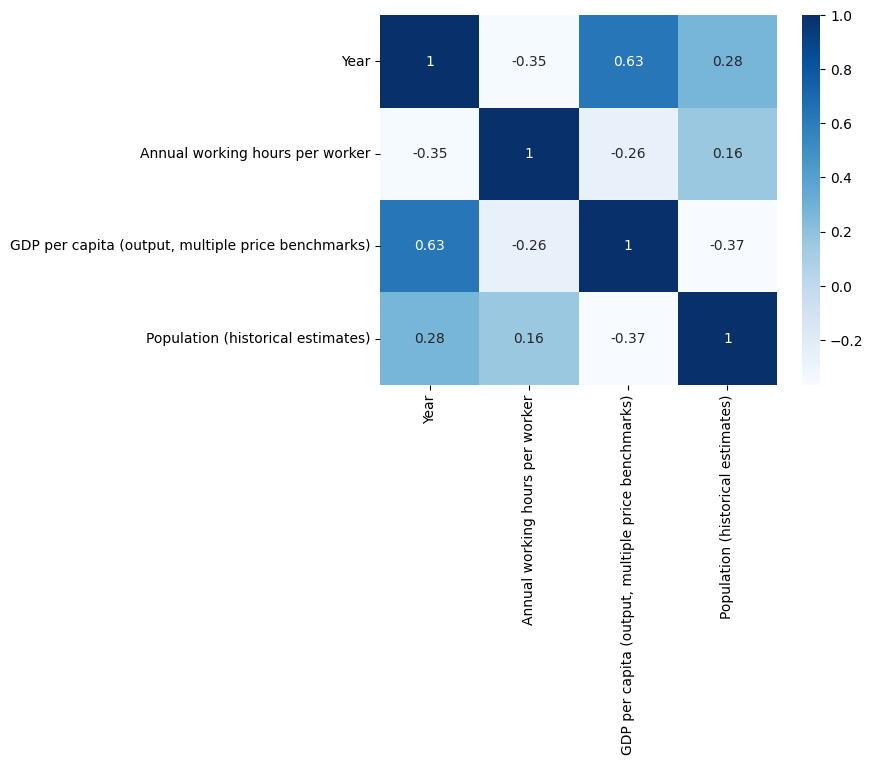

In [ ]:
corr = df.corr()
sns.heatmap(data = corr, cmap = 'Blues', annot=True)

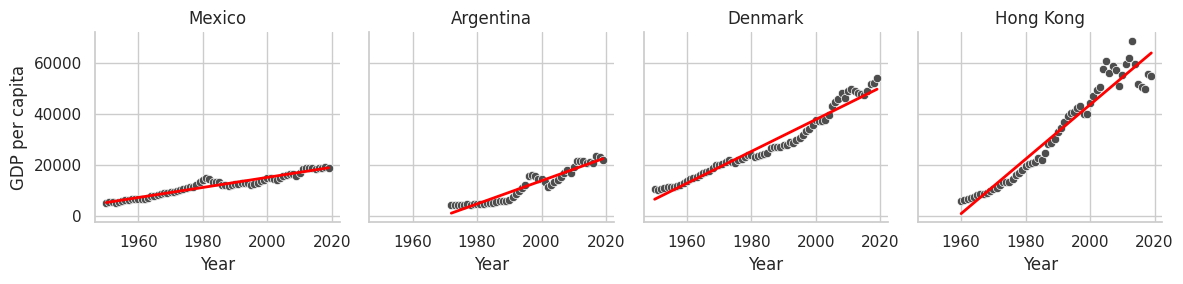

In [ ]:
# Configura el estilo de los gráficos
sns.set(style="whitegrid")

# Crea un gráfico de dispersión parcial para cada país
g = sns.FacetGrid(df, col="Entity", margin_titles=True)
g.map(sns.scatterplot, "Year", "GDP per capita (output, multiple price benchmarks)", color=".3")

# Agrega la línea de regresión a cada gráfico
for country_name, ax in g.axes_dict.items():
    country_data = df[df['Entity'] == country_name]
    x = country_data['Year'].values.reshape(-1, 1)
    y = country_data['GDP per capita (output, multiple price benchmarks)'].values
    model = LinearRegression().fit(x, y)
    ax.plot(x, model.predict(x), color='red', linewidth=2)

# Personaliza los gráficos
g.set_axis_labels("Year", "GDP per capita")
g.set_titles(col_template="{col_name}")



In [ ]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

ValueError: ignored

In [ ]:
model.intercept_

-1345205.770241257

In [ ]:
print(f"Coeficiente para el año: {model.coef_[0]}\nCoeficiente para las horas trabajadas por trabajador al año {model.coef_[1]}\nCoeficiente para el número de habitantes {model.coef_[2]}")

Coeficiente para el año: 685.4236201597932
Coeficiente para las horas trabajadas por trabajador al año 6.311602717395711
Coeficiente para el número de habitantes -0.0002819706079559836


In [ ]:
y_ = model.predict(X)
print(y_)

[-2054.22445728 -1576.71134397 -1100.82161576  -632.48418832
  -173.83809067   273.40455165   709.77510571  1134.93062803
  1552.47533413  1953.45081615  2329.25309017  2627.41284499
  2905.29978871  3167.94102777  3415.88345071  3649.28757911
  3872.10664091  4085.54119973  4288.80435592  4483.63692879
  4669.98915708  4890.78013051  5101.03974442  5300.30809166
  5491.85329463  5675.42066392  5854.86015897  6020.40418349
  6171.42640045  6326.00324714  6513.47383254  6773.79692698
  7063.88898803  7353.83983594  7647.79430419  7949.35710505
  8259.38506687  8575.96015836  8889.89564268  9202.92268492
  9475.8148122   9654.39511764  9830.20838616 10002.31080801
 10171.5582181  10484.95166333 10910.09075042 11454.60893296
 11232.58771762 11943.07537149 11765.45875064 11845.32531531
 12416.94648531 12341.44116198 12473.032196   12622.85426691
 12661.16089344 12808.40699036 13482.97873926 12950.40122275
 14334.82287958 14380.95901962 14607.38639999 14961.03619759
 15220.69102178 15550.91

Text(0.5, 1.0, 'Predicción del GDP a lo largo del tiempo')

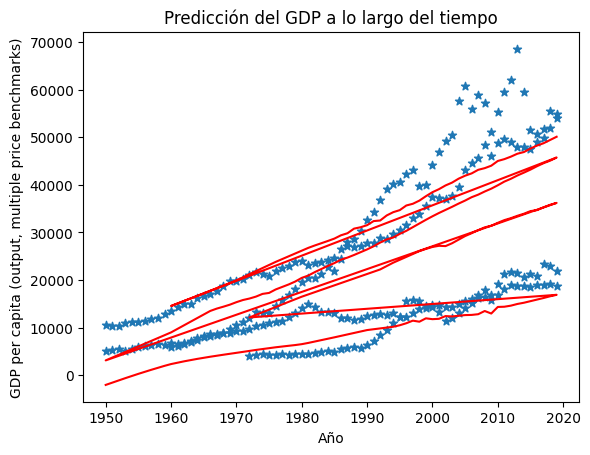

In [ ]:
x =df['Year']
fig = plt.figure()
plt.scatter(df['Year'],df['GDP per capita (output, multiple price benchmarks)'], marker='*')
plt.plot(x,y_, c='red')
plt.xlabel('Año')
plt.ylabel('GDP per capita (output, multiple price benchmarks)')
plt.title('Predicción del GDP a lo largo del tiempo')

Text(0.5, 1.0, 'Annual working hours per worker')

<Figure size 640x480 with 0 Axes>

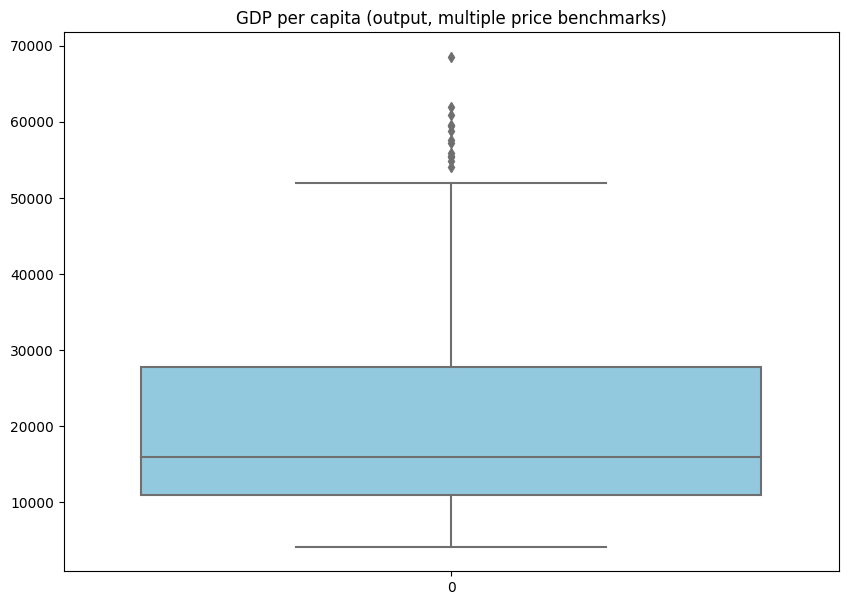

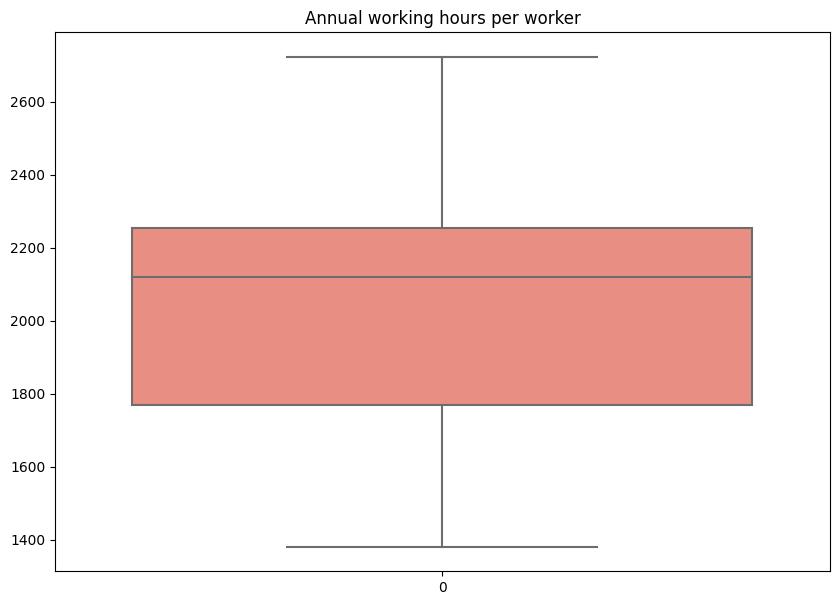

In [ ]:
plt.clf()
fig = plt.figure(figsize=(10,7))
sns.boxplot(data= df['GDP per capita (output, multiple price benchmarks)'], color='skyblue')
plt.title('GDP per capita (output, multiple price benchmarks)')
fig = plt.figure(figsize=(10,7))
sns.boxplot(data= df['Annual working hours per worker'], color='salmon')
plt.title('Annual working hours per worker')

<Axes: xlabel='Entity', ylabel='GDP per capita (output, multiple price benchmarks)'>

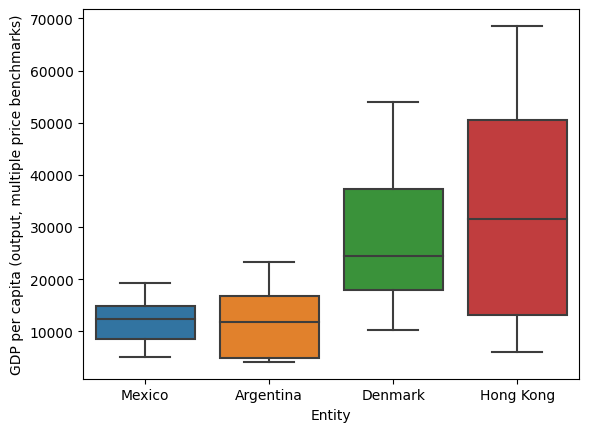

In [ ]:
sns.boxplot(data = df, y = 'GDP per capita (output, multiple price benchmarks)', x ='Entity')

In [ ]:
columns = ['Year', 'Annual working hours per worker', 'Population (historical estimates)']
x = df.loc[:, columns]
scaler = StandardScaler()

x_norm = scaler.fit_transform(x)
df_norm = pd.DataFrame(x_norm, columns = columns)
print(df_norm.head())

       Year  Annual working hours per worker  \
0 -1.998470                         0.785275   
1 -1.945655                         0.784016   
2 -1.892839                         0.782757   
3 -1.840024                         0.781499   
4 -1.787208                         0.780241   

   Population (historical estimates)  
0                          -0.084618  
1                          -0.063036  
2                          -0.041283  
3                          -0.018736  
4                           0.004830  


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmax = 20
grupos = range(2,kmax)
wcss = []
score = []
for k in grupos:
  model = KMeans(n_clusters = k)
  cluster = model.fit_predict(df_norm)
  wcss.append(model.inertia_)
  score.append(silhouette_score(df_norm,cluster))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Figure size 640x480 with 0 Axes>

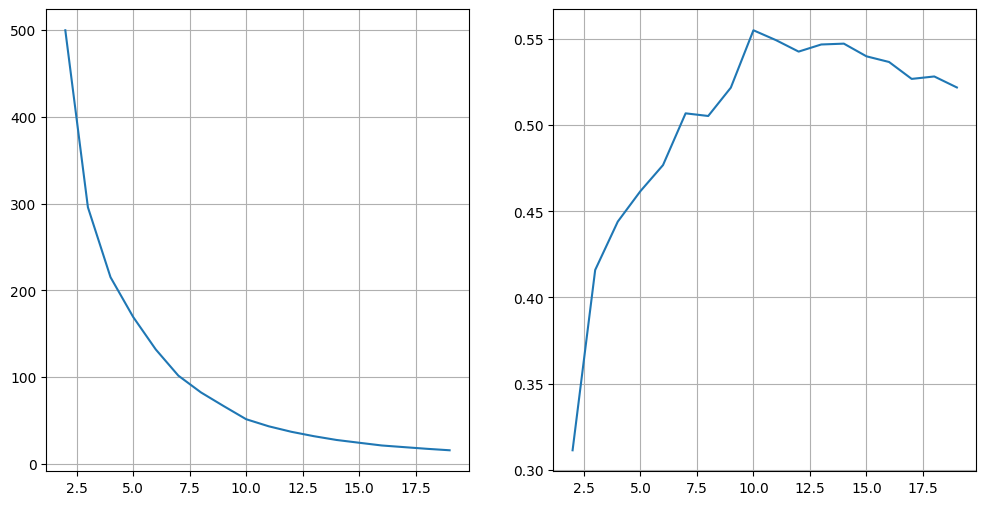

In [ ]:
plt.clf()
fig, axs = plt.subplots(1,2,figsize =(12,6))

axs[0].plot(grupos,wcss)
axs[0].grid(True)
axs[1].plot(grupos,score)
axs[1].grid(True)

In [ ]:
model = KMeans(n_clusters = 6)
clusters = model.fit_predict(df_norm)

df['Grupo'] = clusters.astype('str')
print(df.head())

   Entity Code  Year  Annual working hours per worker  \
0  Mexico  MEX  1950                        2274.8445   
1  Mexico  MEX  1951                        2274.4216   
2  Mexico  MEX  1952                        2273.9990   
3  Mexico  MEX  1953                        2273.5764   
4  Mexico  MEX  1954                        2273.1538   

   GDP per capita (output, multiple price benchmarks)  \
0                                          5064.5550    
1                                          5332.2856    
2                                          5401.7485    
3                                          5171.1130    
4                                          5574.5737    

   Population (historical estimates) Grupo  
0                           27600140     1  
1                           28328022     1  
2                           29061668     1  
3                           29822098     1  
4                           30616898     1  


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


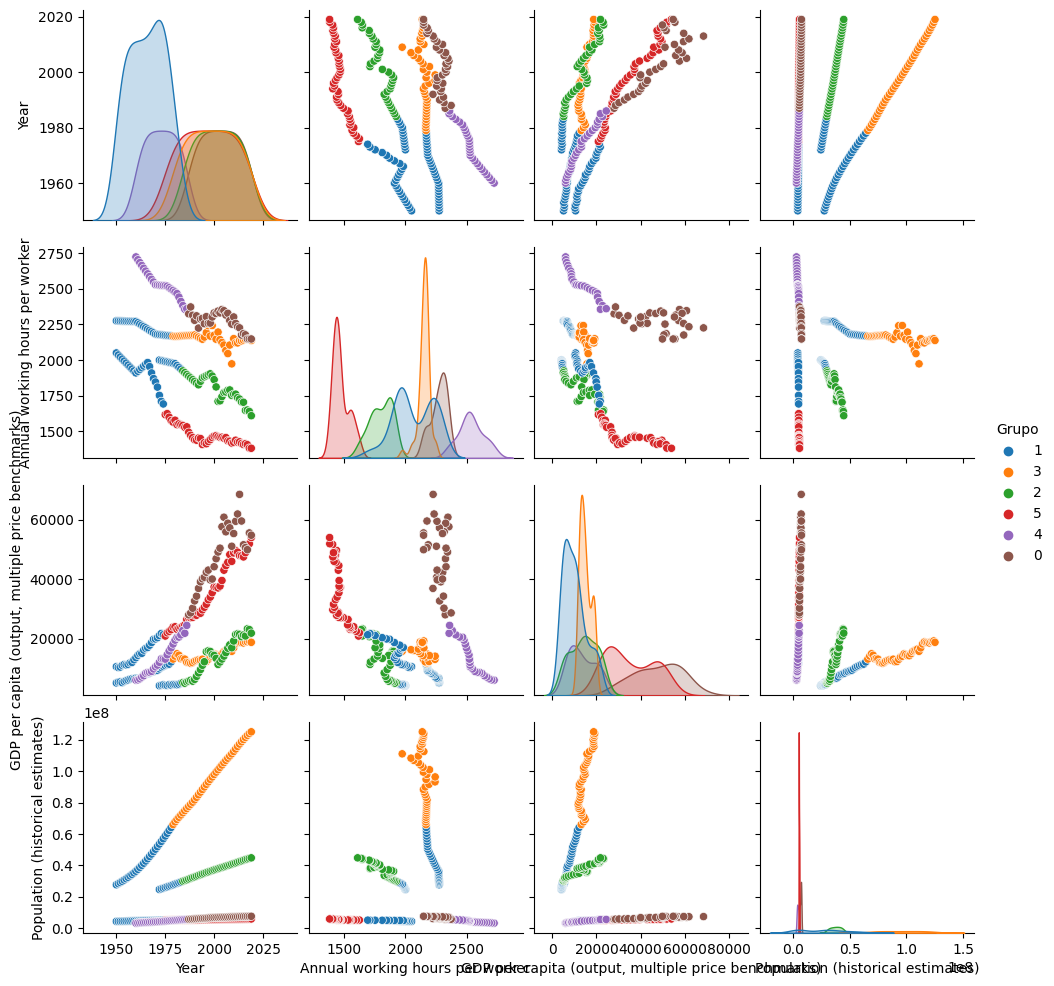

In [ ]:
sns.pairplot(data = df, hue = 'Grupo')

In [ ]:
df.groupby("Grupo").mean()

<ipython-input-154-22b0eb2cf583>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Grupo").mean()


,Year,Annual working hours per worker,"GDP per capita (output, multiple price benchmarks)",Population (historical estimates)
Grupo,,,,
0,2003.00000,2272.239027,47751.644636,6.725022e+06
1,1965.69697,2065.953121,10052.343012,2.556502e+07
2,2001.50000,1797.302569,14135.258622,3.754154e+07
3,1999.00000,2149.664673,14905.663305,9.599518e+07
4,1973.00000,2533.312607,13571.242819,4.300650e+06
5,1997.00000,1470.458398,35209.779956,5.332483e+06
